<a href="https://colab.research.google.com/github/Zu92/nlp/blob/main/Zubieta_3erdesafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec

In [2]:
# Descargar la carpeta de dataset
import os
import platform
if os.access('./songs_dataset', os.F_OK) is False:
    if os.access('songs_dataset.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip -o songs_dataset.zip
        else:
            !wget songs_dataset.zip https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
    !unzip -q songs_dataset.zip   
else:
    print("El dataset ya se encuentra descargado")

--2023-05-26 15:43:31--  http://songs_dataset.zip/
Resolving songs_dataset.zip (songs_dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘songs_dataset.zip’
--2023-05-26 15:43:32--  https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip [following]
--2023-05-26 15:43:32--  https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.

In [3]:
# Posibles bandas
os.listdir("./songs_dataset/")

['ludacris.txt',
 'bruce-springsteen.txt',
 'michael-jackson.txt',
 'notorious-big.txt',
 'britney-spears.txt',
 'Kanye_West.txt',
 'radiohead.txt',
 'nicki-minaj.txt',
 'kanye.txt',
 'nirvana.txt',
 'rihanna.txt',
 'lin-manuel-miranda.txt',
 'janisjoplin.txt',
 'bieber.txt',
 'nickelback.txt',
 'johnny-cash.txt',
 'blink-182.txt',
 'patti-smith.txt',
 'eminem.txt',
 'lorde.txt',
 'dickinson.txt',
 'adele.txt',
 'bob-dylan.txt',
 'paul-simon.txt',
 'drake.txt',
 'joni-mitchell.txt',
 'r-kelly.txt',
 'jimi-hendrix.txt',
 'missy-elliott.txt',
 'Lil_Wayne.txt',
 'dolly-parton.txt',
 'al-green.txt',
 'bjork.txt',
 'prince.txt',
 'amy-winehouse.txt',
 'disney.txt',
 'lil-wayne.txt',
 'alicia-keys.txt',
 'notorious_big.txt',
 'leonard-cohen.txt',
 'dr-seuss.txt',
 'cake.txt',
 'bob-marley.txt',
 'bruno-mars.txt',
 'dj-khaled.txt',
 'beatles.txt',
 'nursery_rhymes.txt',
 'lady-gaga.txt',
 'kanye-west.txt']

In [6]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv('songs_dataset/disney.txt', sep='/n', header=None)
df.head()

<ipython-input-6-802f6c0af91f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('songs_dataset/disney.txt', sep='/n', header=None)


,0
0,When somebody loved me
1,Everything was beautiful
2,Every hour we spent together
3,Lives within my heart And when she was sad
4,I was there to dry her tears


In [7]:

print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 2499


In [35]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:",  len(w2v_model.wv.key_to_index))

Cantidad de words distintas en el corpus: 535


In [8]:
from keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [9]:
# Demos un vistazo
sentence_tokens[:2]

[['when', 'somebody', 'loved', 'me'], ['everything', 'was', 'beautiful']]

In [10]:
from gensim.models.callbacks import CallbackAny2Vec
# Durante el entrenamiento gensim por defecto no informa el "loss" en cada época
# Sobrecargamos el callback para poder tener esta información
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [11]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=300,       # dimensionalidad de los vectores 
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [12]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [15]:

print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 2499


In [19]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 139809.6875
Loss after epoch 1: 76958.71875
Loss after epoch 2: 75630.75
Loss after epoch 3: 74938.4375
Loss after epoch 4: 73700.8125
Loss after epoch 5: 74565.34375
Loss after epoch 6: 75929.875
Loss after epoch 7: 73588.5
Loss after epoch 8: 74122.5
Loss after epoch 9: 72796.125
Loss after epoch 10: 72552.8125
Loss after epoch 11: 70682.75
Loss after epoch 12: 70042.5
Loss after epoch 13: 63759.8125
Loss after epoch 14: 60933.625
Loss after epoch 15: 60333.75
Loss after epoch 16: 60269.25
Loss after epoch 17: 60107.125
Loss after epoch 18: 59576.375
Loss after epoch 19: 58719.0


(187145, 350840)

In [22]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["love"], topn=10)

[('more', 0.922218382358551),
 ('than', 0.9067693948745728),
 ("you'll", 0.9046448469161987),
 ('last', 0.892278790473938),
 ('find', 0.8921127319335938),
 ('learn', 0.8874883651733398),
 ('tonight', 0.8834723234176636),
 ('feel', 0.8777900338172913),
 ('thought', 0.8757887482643127),
 ('way', 0.8735491633415222)]

In [23]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["heart"], topn=10)

[('my', 0.9368848204612732),
 ('in', 0.8880547285079956),
 ('here', 0.8880146145820618),
 ('would', 0.8816394805908203),
 ('within', 0.878869354724884),
 ('by', 0.8735052943229675),
 ("you'll", 0.8722706437110901),
 ('thought', 0.8594571948051453),
 ('each', 0.8579911589622498),
 ('lives', 0.8574801087379456)]

In [24]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["friend"], topn=10)

[('had', 0.9413434267044067),
 ("you've", 0.9403451681137085),
 ("i've", 0.92673659324646),
 ('got', 0.9204878807067871),
 ('been', 0.9031662940979004),
 ('strings', 0.8586952686309814),
 ("ain't", 0.8551014065742493),
 ('everything', 0.8145700097084045),
 ("we've", 0.8022918105125427),
 ('girls', 0.7950414419174194)]

In [25]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["life"], topn=10)

[('circle', 0.9153592586517334),
 ('necessities', 0.8947654366493225),
 ('bare', 0.8929601907730103),
 ('green', 0.8892955183982849),
 ('die', 0.8804923892021179),
 ('heave', 0.8612946271896362),
 ('thieves', 0.8480879068374634),
 ('hey', 0.8381467461585999),
 ('yo', 0.8322283029556274),
 ('beggars', 0.8307238221168518)]

In [38]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
import numpy as np                                  

def reduce_dimensions(model):
    num_dimensions = 2  

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [40]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

x_vals, y_vals, labels =  reduce_dimensions(w2v_model)


MAX_WORDS=200
fig = px.scatter(x=x_vals[:MAX_WORDS], y=y_vals[:MAX_WORDS], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

Si hacemos foco en la parte superior vemos como la palabra friend se vincula a verboas de tener, querer y ser.

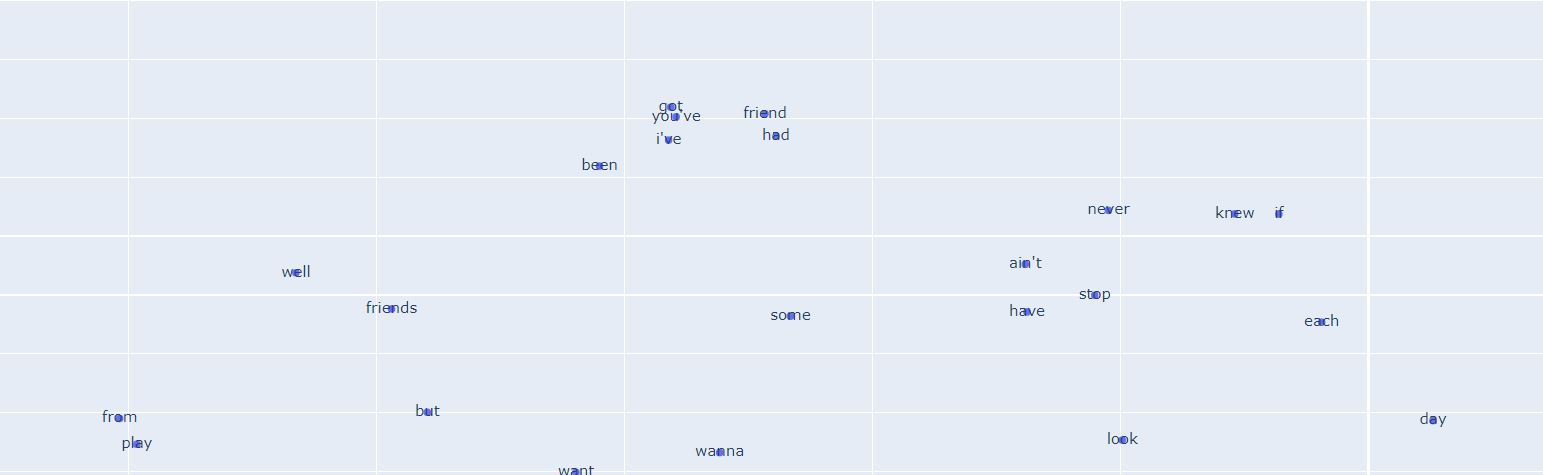
